In [2]:
import numpy as np
import xarray as xr

data_path = 'processed_airs_sftp/40_km_grid/30km/mfx/2002-08-31_mfx.npz'
lat_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lat_40_grid.csv'
lon_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lon_40_grid.csv'


# read file from data_path
data = np.load(data_path)['arr_0'].flatten()
# read lat and lon files
lat = np.genfromtxt(lat_file, delimiter=',').flatten()
lon = np.genfromtxt(lon_file, delimiter=',').flatten()


# Assuming data, lat, and lon are defined
lat_space = np.linspace(lat.min(), lat.max(), 500)
lon_space = np.linspace(lon.min(), lon.max(), 500)

# Initialize an empty list in each grid cell
data_new = np.empty((500, 500), dtype=object)
for i in range(500):
    for j in range(500):
        data_new[i, j] = []

# Assign data points to their closest lat and lon spaces
for i in range(len(data)):
    lat_index = np.abs(lat_space - lat[i]).argmin()
    lon_index = np.abs(lon_space - lon[i]).argmin()
    data_new[lat_index, lon_index].append(data[i])

# Calculate the mean for each grid cell and replace the list with the mean value
mean_data_new = np.zeros((500, 500))
for i in range(500):
    for j in range(500):
        if len(data_new[i, j]) > 0:
            mean_data_new[i, j] = np.mean(data_new[i, j])

# save into xarray the mean_data_new and the lat_space and lon_space coordinates, and specify the dimension and altitude of that data to be 2002-08-31 and 30km 
ds = xr.Dataset({'data': (['lat', 'lon'], mean_data_new)},
                coords={'lat': lat_space,
                        'lon': lon_space,
                        'time': '2002-08-31',
                        'altitude': '30km'})


In [26]:
from datetime import datetime

In [84]:
import numpy as np
import xarray as xr
import pandas as pd

shape = (500, 500)

def process_data_for_date_and_altitude(date_str, altitude_str):
    data_path = f'processed_airs_sftp/40_km_grid/{altitude_str}/mfx/{date_str}_mfx.npz'
    
    # read file from data_path
    data = np.load(data_path)['arr_0'].flatten()
    
    # Assign data points to their closest lat and lon spaces
    for i in range(len(data)):
        lat_index = np.abs(lat_space - lat[i]).argmin()
        lon_index = np.abs(lon_space - lon[i]).argmin()
        data_new[lat_index, lon_index].append(data[i])

    # Calculate the mean for each grid cell and replace the list with the mean value
    mean_data_new = np.zeros((shape[0], shape[1]))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if len(data_new[i, j]) > 0:
                mean_data_new[i, j] = np.mean(data_new[i, j])

    return mean_data_new

# read lat and lon files
lat_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lat_40_grid.csv'
lon_file = '/Users/joaojesus/Desktop/final_year_proj/coordinates_40km_grid/Airs_nh_lon_40_grid.csv'
lat = np.genfromtxt(lat_file, delimiter=',').flatten()
lon = np.genfromtxt(lon_file, delimiter=',').flatten()

# Define lat and lon spaces
lat_space = np.linspace(lat.min(), lat.max(), shape[0])
lon_space = np.linspace(lon.min(), lon.max(), shape[1])

# Generate a list of dates for January 2009
dates = pd.date_range(start='2009-01-01', end='2009-01-30', freq='D').strftime('%Y-%m-%d').tolist()

# Loop through dates and altitudes

def get_data_at_altitude(altitude_str):
    data_arrays = []
    for date_str in dates:
            print(date_str, altitude_str)
            data_new = np.empty((shape[0], shape[1]), dtype=object)
            for i in range(shape[0]):
                for j in range(shape[1]):
                    data_new[i, j] = []
            
            mean_data_new = process_data_for_date_and_altitude(date_str, altitude_str)
            
            da = xr.DataArray(mean_data_new, 
                
                coords={'lat': (('lat'), lat_space), 
                        'lon': (('lon'), lon_space),
                        'time': datetime.strptime(date_str, '%Y-%m-%d')},
                        dims=('lat', 'lon'),
                        attrs={'altitude': altitude_str})
            
            data_arrays.append(da)
    
    combined_data = xr.concat(data_arrays, dim=('time'))

    # set altitude dimension
    combined_data.coords['altitude'] = int(altitude_str[:-2])

    # Expand the dimensions of altitude
    combined_data = combined_data.expand_dims({'altitude': [int(altitude_str[:-2])]})

    return combined_data

data_30km = get_data_at_altitude('24km')
data_30km = get_data_at_altitude('30km')
data_36km = get_data_at_altitude('36km')



2009-01-01 24km
2009-01-02 24km
2009-01-03 24km
2009-01-04 24km
2009-01-05 24km
2009-01-06 24km
2009-01-07 24km
2009-01-08 24km
2009-01-09 24km
2009-01-10 24km
2009-01-11 24km
2009-01-12 24km
2009-01-13 24km
2009-01-14 24km
2009-01-15 24km
2009-01-16 24km
2009-01-17 24km
2009-01-18 24km
2009-01-19 24km
2009-01-20 24km
2009-01-21 24km
2009-01-22 24km
2009-01-23 24km
2009-01-24 24km
2009-01-25 24km
2009-01-26 24km
2009-01-27 24km
2009-01-28 24km
2009-01-29 24km
2009-01-30 24km
2009-01-01 30km
2009-01-02 30km
2009-01-03 30km
2009-01-04 30km
2009-01-05 30km
2009-01-06 30km
2009-01-07 30km
2009-01-08 30km
2009-01-09 30km
2009-01-10 30km
2009-01-11 30km
2009-01-12 30km
2009-01-13 30km
2009-01-14 30km
2009-01-15 30km
2009-01-16 30km
2009-01-17 30km
2009-01-18 30km
2009-01-19 30km
2009-01-20 30km
2009-01-21 30km
2009-01-22 30km
2009-01-23 30km
2009-01-24 30km
2009-01-25 30km
2009-01-26 30km
2009-01-27 30km
2009-01-28 30km
2009-01-29 30km
2009-01-30 30km
2009-01-01 36km
2009-01-02 36km
2009-01-

In [88]:

print('concat data')
# Combine data at both altitudes
combined_data = xr.concat([data_30km, data_36km], dim='time')

# Create an xarray Dataset with a data variable named 'mfx'
ds = xr.Dataset({'mfx': combined_data})

# Save the combined dataset to a new .nc file
ds.to_netcdf('airs_combined_data_with_coordinates.nc')
print('save to net_cdf')

concat data
save to net_cdf


In [89]:
ds

<xarray.Dataset>
Dimensions:   (lat: 500, lon: 500, altitude: 2, time: 60)
Coordinates:
  * lat       (lat) float64 -37.18 -36.93 -36.67 -36.42 ... 89.49 89.75 90.0
  * lon       (lon) float64 -180.0 -179.3 -178.6 -177.8 ... 178.3 179.0 179.8
  * altitude  (altitude) int64 30 36
  * time      (time) datetime64[ns] 2009-01-01 2009-01-02 ... 2009-01-30
Data variables:
    mfx       (altitude, time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

TypeError: hist() got multiple values for argument 'x'

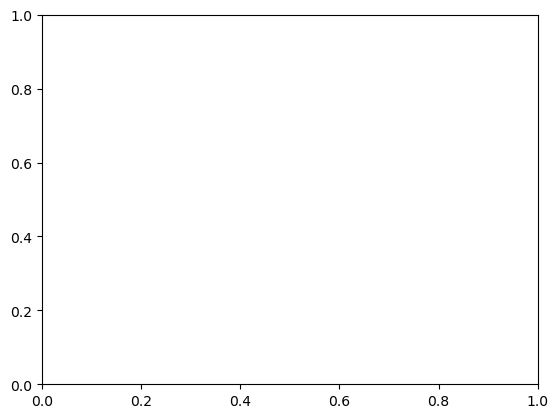

In [91]:
import xarray as xr
import matplotlib.pyplot as plt


# plot with altitude on the y axis and latitude on the x axis
ds.mfx.isel(time=0).plot(y='altitude', x='lat')
plt.show()

